<a href="https://colab.research.google.com/github/SharatGupta/DSML-Projects/blob/main/Business_Case__Scaler_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Case : Scaler : Clustering**

### **Problem Statement**
Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts. The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to the latest technologies. It is a product by InterviewBit.

You are working as a data scientist with the analytics vertical of Scaler, focused on profiling the best companies and job positions to work for from the Scaler database. You are provided with the information for a segment of learners and tasked to cluster them on the basis of their job profile, company, and other features. Ideally, these clusters should have similar characteristics.


### **Dataset**

Dataset Link : scaler_kmeans.csv

### **Data Dictionary:**

- ‘Unnamed 0’- Index of the dataset
- Email_hash- Anonymised Personal Identifiable Information (PII)
- Company_hash- Current employer of the learner
- orgyear- Employment start date
- CTC- Current CTC
- Job_position- Job profile in the company
- CTC_updated_year: Year in which CTC got updated (Yearly increments, Promotions)

### **Concept Used:**

- Manual Clustering
- Unsupervised Clustering - K- means, Hierarchical Clustering

In [ ]:
# Data processing
import re
import numpy as np
import pandas as pd
# Data Visualisation
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import figure
# Sklearn Preprocessing
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch

import time
# Hide warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv
To: /content/scaler_clustering.csv
100% 24.7M/24.7M [00:00<00:00, 244MB/s]


In [ ]:
df = pd.read_csv("scaler_clustering.csv")
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [ ]:
# Remove Unwanted column
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [ ]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [ ]:
# shape of data
df.shape

(205843, 6)

- The dataset has 205843 rows and 6 columns

In [ ]:
df.nunique()

company_hash         37299
email_hash          153443
orgyear                 77
ctc                   3360
job_position          1017
ctc_updated_year         7
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   email_hash        205843 non-null  object 
 2   orgyear           205757 non-null  float64
 3   ctc               205843 non-null  int64  
 4   job_position      153281 non-null  object 
 5   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.4+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
orgyear,205757.0,2.014883e+03,6.357112e+01,0.0,2013.0,2016.0,2018.0,2.016500e+04
ctc,205843.0,2.271685e+06,1.180091e+07,2.0,530000.0,950000.0,1700000.0,1.000150e+09
ctc_updated_year,205843.0,2.019628e+03,1.325104e+00,2015.0,2019.0,2020.0,2021.0,2.021000e+03


- Based on above information, we noticing some unusual outliers in the data.  

In [ ]:
df.describe(include="object")

,company_hash,email_hash,job_position
count,205799,205843,153281
unique,37299,153443,1017
top,nvnv wgzohrnvzwj otqcxwto,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Backend Engineer
freq,8337,10,43554


In [ ]:
# Checking Missing Value
def missingValue(df):
    # Identifying Missing data.
    total_null = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
    print("Total Records = ", df.shape[0])

    md = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
    return md
print("Total Columns = ", df.shape[1])
missingValue(df)

Total Columns =  6
Total Records =  205843


,Total Missing,In Percent
job_position,52562,25.53
orgyear,86,0.04
company_hash,44,0.02
email_hash,0,0.00
ctc,0,0.00
ctc_updated_year,0,0.00


- There are missing values found in job_position, orgyear and company_hash

In [ ]:
# Checking the anamolies in Personal Identifiable Information (PII) id
df['email_hash'].value_counts().head()

bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66     8
Name: email_hash, dtype: int64

In [ ]:
display(df[df['email_hash'] == 'bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b'])
display(df[df['email_hash'] == '6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c'])

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
24109,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,NaN,2020.0
45984,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Support Engineer,2020.0
72315,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Other,2020.0
102915,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,FullStack Engineer,2020.0
117764,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Data Analyst,2020.0
121483,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Other,2019.0
124476,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Support Engineer,2019.0
144479,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,FullStack Engineer,2019.0
152801,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Devops Engineer,2019.0
159835,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,NaN,2019.0


,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
9857,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,QA Engineer,2020.0
10002,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,Devops Engineer,2020.0
10583,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,Backend Engineer,2020.0
12784,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,Other,2020.0
20715,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,SDET,2020.0
138253,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2000000,SDET,2020.0
159251,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2000000,Devops Engineer,2020.0
165343,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2000000,Other,2020.0
178749,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2000000,Backend Engineer,2020.0


In [ ]:
df = df.groupby('email_hash').first().reset_index()

In [ ]:
display(df[df['email_hash'] == 'bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b'])
display(df[df['email_hash'] == '6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c'])

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year
112448,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,oxej ntwyzgrgsxto rxbxnta,2018.0,720000,Support Engineer,2020.0


,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year
62459,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,ihvrwgbb,2017.0,2400000,QA Engineer,2020.0


Apparently for single Anonymised Personal Identifiable Information (PII) id there exists multiple rows with same joining dates and company but different job positions, this couldn't be possible. We will take the first row in case of duplicated PII ids.

In [ ]:
df = df.reindex(columns=['company_hash', 'email_hash', 'orgyear', 'ctc','job_position', 'ctc_updated_year'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153443 entries, 0 to 153442
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      153411 non-null  object 
 1   email_hash        153443 non-null  object 
 2   orgyear           153365 non-null  float64
 3   ctc               153443 non-null  int64  
 4   job_position      133219 non-null  object 
 5   ctc_updated_year  153443 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 7.0+ MB


In [ ]:
missingValue(df)

Total Records =  153443


,Total Missing,In Percent
job_position,20224,13.18
orgyear,78,0.05
company_hash,32,0.02
email_hash,0,0.00
ctc,0,0.00
ctc_updated_year,0,0.00


# Data Cleaning through Regular Expression

In [ ]:
def preprocess_string(string):
    new_string= re.sub('[^A-Za-z ]+', '', string).lower().strip()
    return new_string

mystring='\tAirtel X Labs'
preprocess_string(mystring)

'airtel x labs'

In [ ]:
df["company_hash"].nunique()

36339

In [ ]:
df["company_hash"] = df["company_hash"].apply(lambda x: preprocess_string(str(x)))
df["company_hash"].nunique()

36255

In [ ]:
df["job_position"].nunique()

821

In [ ]:
df["job_position"] = df["job_position"].apply(lambda x: preprocess_string(str(x)))
df["job_position"].nunique()

710

In [ ]:
df["job_position"]=df["job_position"].str.lower().str.replace(r"([^A-Za-z\s])|(\si+$)|(senior\s+)|(development\s+)|(associate\s+)|(member\s+of)|(member\s+)|(sr\s+)|(lead\s+)|(assistant\s+)|(principal\s+)|r(s$)","",regex=True).str.replace(r"(\sbackend$)|(\sfull\sstack$)","",regex=True).str.replace(r"\s+"," ",regex=True).str.strip()

In [ ]:
df["job_position"].nunique()

596

In [ ]:
jobs=dict(df["job_position"].value_counts()[:40]); jobs

{'backend engineer': 37313,
 'fullstack engineer': 21404,
 'none': 20225,
 'other': 15757,
 'frontend engineer': 9272,
 'engineering leadership': 6190,
 'qa engineer': 6170,
 'data scientist': 4905,
 'android engineer': 4879,
 'sdet': 4503,
 'devops engineer': 4295,
 'support engineer': 3174,
 'ios engineer': 2560,
 'data analyst': 2549,
 'engineering intern': 2084,
 'product designer': 1276,
 'product manager': 1069,
 'backend architect': 1054,
 'research enginee': 979,
 'program manager': 764,
 'non coder': 536,
 'database administrator': 514,
 'cofounder': 329,
 'software engineer': 235,
 'security leadership': 132,
 'release engineer': 117,
 'sde': 59,
 'system engineer': 49,
 'consultant': 37,
 'engineer': 37,
 'software developer': 28,
 'intern': 21,
 'student': 19,
 'research engineer': 19,
 'technical staff': 17,
 'associate': 16,
 'project engineer': 15,
 'data engineer': 13,
 'manager': 11,
 'technology analyst': 11}

In [ ]:
updated = df["job_position"]=='research enginee'
df.loc[updated, 'job_position'] = 'research engineer'

In [ ]:
updated = df["job_position"]=='sde'
df.loc[updated, 'job_position'] = 'sdet'

In [ ]:
df[df["company_hash"]==''].sample(3)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
101403,,a947ac358ba9670159e9b8350ed4e64ee3fad1715521aa...,2019.0,200000000,none,2019.0
19748,,20bce54e9f1230ae7b351d4d1c2cd808fc9f29571067c2...,2012.0,1730000,none,2016.0
46384,,4dbadbcbf0ea7f9b138de45bb5bfa829d9be1a12e90107...,2019.0,2100000,data analyst,2018.0


In [ ]:
df.replace('', np.nan, inplace=True)

In [ ]:
df[df["company_hash"]=='none'].sample(3)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
102374,none,aae19078f349d6403856abf2c28ee731a32c0dbeb8de76...,2018.0,956000,none,2017.0
8848,none,0e781c3797c031c6aad2fa3d97c82773624a5da9a35de9...,2018.0,1800000,none,2016.0
119915,none,c83f98e2b2fb365515f48002f40db363a9de3319069f38...,2014.0,1000000,none,2021.0


In [ ]:
df.replace('none', np.nan, inplace=True)

In [ ]:
jobs=dict(df["job_position"].value_counts()[:40]); jobs

{'backend engineer': 37313,
 'fullstack engineer': 21404,
 'other': 15757,
 'frontend engineer': 9272,
 'engineering leadership': 6190,
 'qa engineer': 6170,
 'data scientist': 4905,
 'android engineer': 4879,
 'sdet': 4562,
 'devops engineer': 4295,
 'support engineer': 3174,
 'ios engineer': 2560,
 'data analyst': 2549,
 'engineering intern': 2084,
 'product designer': 1276,
 'product manager': 1069,
 'backend architect': 1054,
 'research engineer': 998,
 'program manager': 764,
 'non coder': 536,
 'database administrator': 514,
 'cofounder': 329,
 'software engineer': 235,
 'security leadership': 132,
 'release engineer': 117,
 'system engineer': 49,
 'consultant': 37,
 'engineer': 37,
 'software developer': 28,
 'intern': 21,
 'student': 19,
 'technical staff': 17,
 'associate': 16,
 'project engineer': 15,
 'data engineer': 13,
 'programmer analyst': 11,
 'manager': 11,
 'technology analyst': 11,
 'application engineer': 9,
 'team lead': 8}

In [ ]:
df[df['job_position'].isnull()].head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
4,fvrbvqn rvmo,00014d71a389170e668ba96ae8e1f9d991591acc899025...,2009.0,3400000,NaN,2018.0
18,vhnymqxast qtotvqwy otqcxwto,000a028ed6fe3c5a2ebdcdf67b8d4f7785821b51113565...,2016.0,360000,NaN,2020.0
24,evwtmggp,000c89400932b5cc8a3d6c5b6a854c844f0f64a53d7b8a...,2015.0,2100000,NaN,2016.0
26,bxwqgogen qa xzaxv uqxcvnt rna,000dbb08ff8c14f7c6d4729e0d9015c48cc57c6de27cf2...,2016.0,1650000,NaN,2015.0
43,btqwtato mtzk,00116df22630de45964661846326000b8d0ebb0f6da3b8...,2018.0,1400000,NaN,2021.0


In [ ]:
missingValue(df)

Total Records =  153443


,Total Missing,In Percent
job_position,20233,13.19
company_hash,90,0.06
orgyear,78,0.05
email_hash,0,0.00
ctc,0,0.00
ctc_updated_year,0,0.00


# Identify the missing values through KNN Imputation

In [ ]:
# KNN imputation for job position
job_knn = df.iloc[:, [3,5,4]].dropna()
X_train = job_knn.iloc[:, 0:2]
y_train = job_knn.iloc[:, 2]
knn_model = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', metric = 'euclidean', algorithm = 'kd_tree')
knn_model.fit(X_train, y_train)
def impute_job_position (row):
    if pd.isnull(row['job_position']) :
        return knn_model.predict(
            row[["ctc","ctc_updated_year"]].values.reshape((-1, 2)))
    else:
        return row[['job_position']]
df["job_position_imputed"] = df.apply(impute_job_position,axis=1)

In [ ]:
# KNN imputation for company hash
comp_knn = df.iloc[:, [3,5,0]].dropna()
X_train = comp_knn.iloc[:, 0:2]
y_train = comp_knn.iloc[:, 2]
knn_model = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', metric = 'euclidean', algorithm = 'kd_tree')
knn_model.fit(X_train, y_train)
def impute_company_hash (row):
    if pd.isnull(row['company_hash']) :
        return knn_model.predict(
            row[["ctc","ctc_updated_year"]].values.reshape((-1, 2)))
    else:
        return row[['company_hash']]
df["company_hash_imputed"] = df.apply(impute_company_hash,axis=1)

In [ ]:
# KNN imputation for orgyear
orgyear_knn = df.iloc[:, [3,5,2]].dropna()
X_train = orgyear_knn.iloc[:, 0:2]
y_train = orgyear_knn.iloc[:, 2]
knn_model = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', metric = 'euclidean', algorithm = 'kd_tree')
knn_model.fit(X_train, y_train)
def impute_orgyear (row):
    if pd.isnull(row['orgyear']) :
        return knn_model.predict(
            row[["ctc","ctc_updated_year"]].values.reshape((-1, 2)))
    else:
        return row[['orgyear']]
df["orgyear_imputed"] = df.apply(impute_orgyear,axis=1)

In [ ]:
missingValue(df)

Total Records =  153443


,Total Missing,In Percent
job_position,20233,13.19
company_hash,90,0.06
orgyear,78,0.05
email_hash,0,0.00
ctc,0,0.00
ctc_updated_year,0,0.00
job_position_imputed,0,0.00
company_hash_imputed,0,0.00
orgyear_imputed,0,0.00


In [ ]:
# Drop unnecessary columns
df.drop(["job_position","orgyear","company_hash"], axis = 1, inplace = True)

In [ ]:
# Rename imputed columns to original name
df.rename(
    columns={"job_position_imputed": "job_position", "company_hash_imputed": "company_hash", "orgyear_imputed": "orgyear"},
    inplace=True,
)

In [ ]:
# Reset Indexes of columns into original data set column index.
df = df.reindex(columns=['company_hash', 'email_hash', 'orgyear', 'ctc','job_position', 'ctc_updated_year'])

In [ ]:
missingValue(df)

Total Records =  153443


,Total Missing,In Percent
company_hash,0,0.0
email_hash,0,0.0
orgyear,0,0.0
ctc,0,0.0
job_position,0,0.0
ctc_updated_year,0,0.0


In [ ]:
# Checking for duplicate values
df.duplicated().sum()

0

No duplicate records found

# Column Profiling / Feature engineering

column: orgyear

In [ ]:
df[(df["orgyear"]<1900) | (df["orgyear"]>2023)]["orgyear"].value_counts()

2024.0     37
0.0        15
2025.0     10
2026.0      7
3.0         6
2029.0      5
2031.0      3
2.0         3
5.0         2
20165.0     2
1.0         2
6.0         2
91.0        2
83.0        1
2107.0      1
2027.0      1
2028.0      1
200.0       1
201.0       1
208.0       1
38.0        1
4.0         1
2204.0      1
206.0       1
209.0       1
2106.0      1
2101.0      1
Name: orgyear, dtype: int64

In [ ]:
df = df[(df["orgyear"]>=1970) & (df["orgyear"]<=2023)]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153332 entries, 0 to 153442
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      153332 non-null  object 
 1   email_hash        153332 non-null  object 
 2   orgyear           153332 non-null  float64
 3   ctc               153332 non-null  int64  
 4   job_position      153332 non-null  object 
 5   ctc_updated_year  153332 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 8.2+ MB


In [ ]:
df.describe()

,orgyear,ctc,ctc_updated_year
count,153332.000000,1.533320e+05,153332.000000
mean,2014.808096,2.512044e+06,2019.470098
std,4.365889,1.309058e+07,1.367176
min,1970.000000,2.000000e+00,2015.000000
25%,2013.000000,5.500000e+05,2019.000000
50%,2016.000000,9.699990e+05,2020.000000
75%,2018.000000,1.700000e+06,2021.000000
max,2023.000000,1.000150e+09,2021.000000


column: ctc

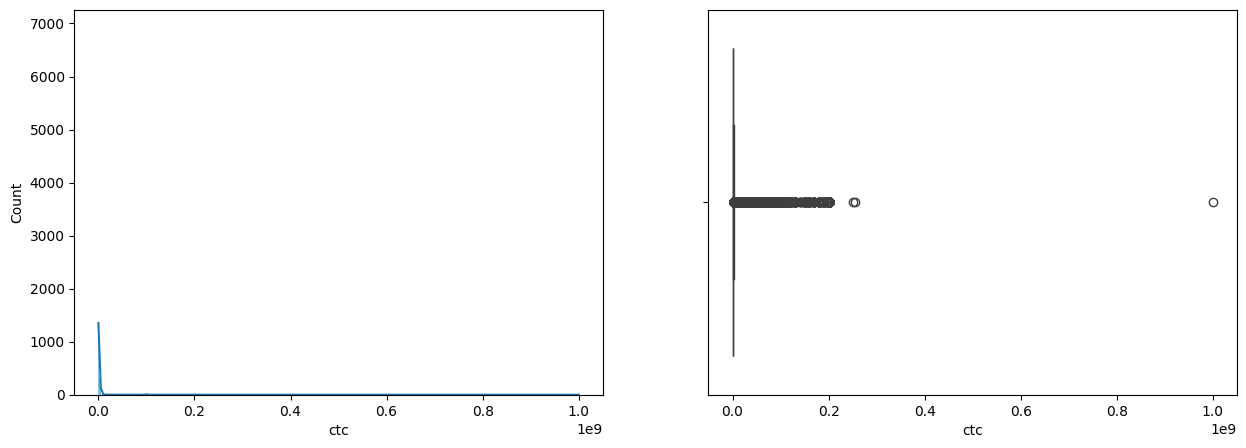

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x=df["ctc"], kde=True)
plt.subplot(1,2,2)
sns.boxplot(x=df["ctc"])
plt.show()

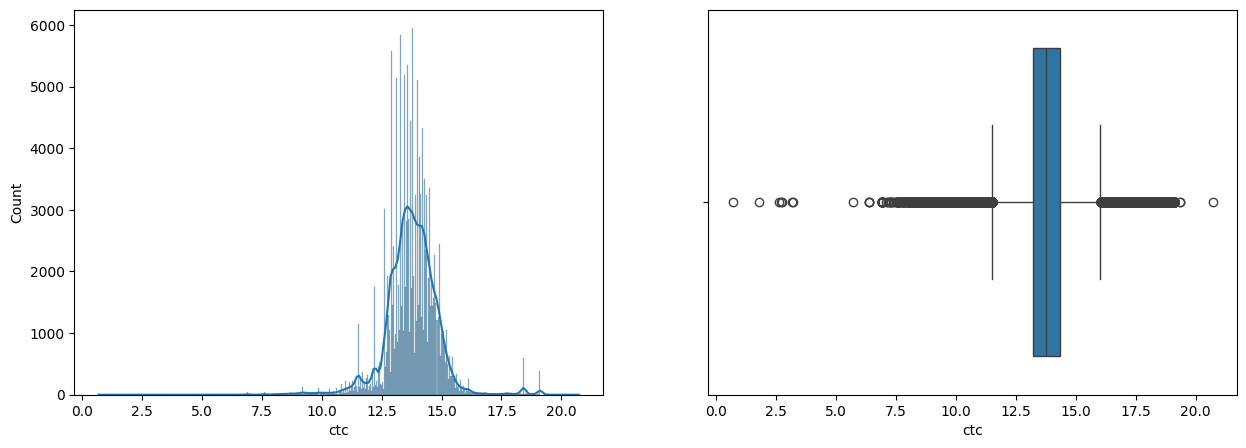

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x=np.log(df["ctc"]), kde=True)
plt.subplot(1,2,2)
sns.boxplot(x=np.log(df["ctc"]))
plt.show()

In [ ]:
# Removing outliers in ctc
df = df[(df["ctc"]>df["ctc"].quantile(0.025))&(df["ctc"]<df["ctc"].quantile(0.975))]

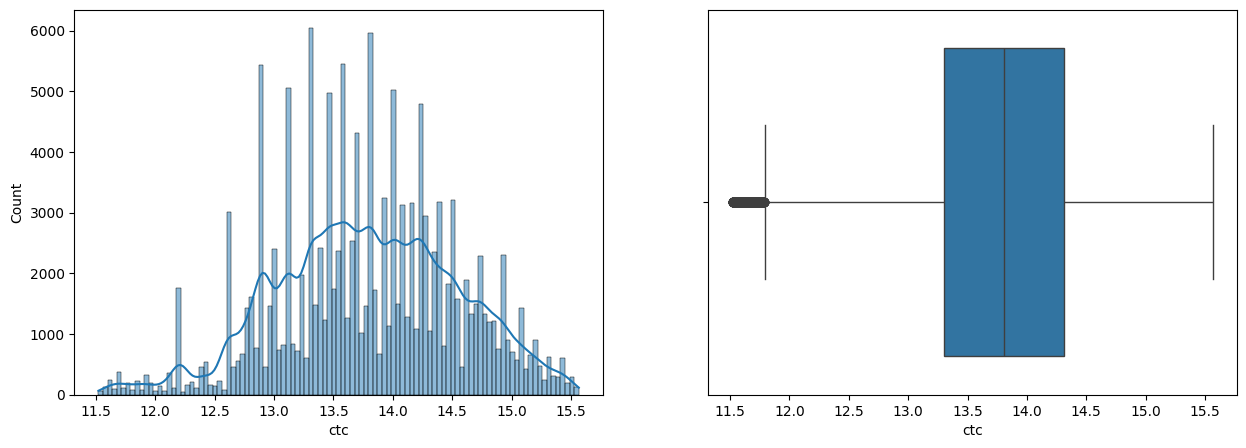

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x=np.log(df["ctc"]), kde=True)
plt.subplot(1,2,2)
sns.boxplot(x=np.log(df["ctc"]))
plt.show()

column: job_position

In [ ]:
df["job_position"] = df["job_position"].apply(lambda x: "other" if x not in jobs else x)

In [ ]:
df["job_position"].value_counts()

backend engineer          44952
fullstack engineer        22815
other                     17023
frontend engineer          9312
android engineer           6632
engineering leadership     6326
qa engineer                6205
data scientist             4919
sdet                       4715
devops engineer            4372
support engineer           3066
data analyst               2668
ios engineer               2478
engineering intern         2113
product designer           1252
backend architect          1219
product manager             978
research engineer           906
program manager             726
non coder                   515
database administrator      472
cofounder                   286
software engineer           229
security leadership         112
release engineer            104
system engineer              47
consultant                   37
engineer                     36
software developer           21
intern                       21
technical staff              17
student 

In [ ]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,bxwqgogen,00003288036a44374976948c327f246fdbdf0778546904...,2012.0,3500000,backend engineer,2019.0
1,nqsn axsxnvr,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,2013.0,250000,backend engineer,2020.0
2,gunhb,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,2021.0,1300000,fullstack engineer,2019.0
3,bxwqgotbx wgqugqvnxgz,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,2004.0,2000000,fullstack engineer,2021.0
4,fvrbvqn rvmo,00014d71a389170e668ba96ae8e1f9d991591acc899025...,2009.0,3400000,backend engineer,2018.0


column: company_hash

In [ ]:
df["company_hash"].value_counts()

nvnv wgzohrnvzwj otqcxwto             5107
xzegojo                               3368
vbvkgz                                2361
wgszxkvzn                             2129
zgn vuurxwvmrt vwwghzn                2095
                                      ... 
ftrro evqsg xzaxv ogrhnxgz               1
nh aqtoatz stqbvzj                       1
yxzahlv srgmvr ogrhnxgzo mvzsvrgqt       1
trtcv xzegntwy                           1
trnqvcg                                  1
Name: company_hash, Length: 33362, dtype: int64

In [ ]:
df.shape

(144677, 6)

In [ ]:
df.columns

Index(['company_hash', 'email_hash', 'orgyear', 'ctc', 'job_position', 'ctc_updated_year'], dtype='object')

In [ ]:
df["Years_of_Experience"]=df["ctc_updated_year"]-df["orgyear"]

In [ ]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_Experience
0,bxwqgogen,00003288036a44374976948c327f246fdbdf0778546904...,2012.0,3500000,backend engineer,2019.0,7.0
1,nqsn axsxnvr,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,2013.0,250000,backend engineer,2020.0,7.0
2,gunhb,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,2021.0,1300000,fullstack engineer,2019.0,-2.0
3,bxwqgotbx wgqugqvnxgz,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,2004.0,2000000,fullstack engineer,2021.0,17.0
4,fvrbvqn rvmo,00014d71a389170e668ba96ae8e1f9d991591acc899025...,2009.0,3400000,backend engineer,2018.0,9.0


In [ ]:
df=df[df["Years_of_Experience"]>=0]

In [ ]:
df.describe()

,orgyear,ctc,ctc_updated_year,Years_of_Experience
count,138297.000000,1.382970e+05,138297.000000,138297.000000
mean,2014.647165,1.272008e+06,2019.557691,4.910526
std,4.260771,9.836514e+05,1.284612,4.070110
min,1970.000000,1.008000e+05,2015.000000,0.000000
25%,2013.000000,6.000000e+05,2019.000000,2.000000
50%,2015.000000,9.900000e+05,2020.000000,4.000000
75%,2018.000000,1.650000e+06,2021.000000,7.000000
max,2021.000000,5.750000e+06,2021.000000,51.000000


In [ ]:
df["Years_of_Experience"].value_counts()

2.0     18362
3.0     18271
4.0     16881
1.0     14492
5.0     14129
6.0     11130
0.0      9468
7.0      8701
8.0      6417
9.0      4835
10.0     3432
11.0     2474
12.0     1916
13.0     1575
14.0     1372
15.0     1135
16.0      871
17.0      615
18.0      479
19.0      440
20.0      366
21.0      251
22.0      183
23.0      131
24.0       73
25.0       60
26.0       56
30.0       48
28.0       38
27.0       36
29.0       29
31.0        7
33.0        5
32.0        4
35.0        3
34.0        3
38.0        1
50.0        1
47.0        1
48.0        1
40.0        1
42.0        1
51.0        1
44.0        1
36.0        1
Name: Years_of_Experience, dtype: int64

In [ ]:
df.shape

(138297, 7)

# Univariate Analysis

In [ ]:
def univariate_analysis(df, col, width, height):
    tmp = df.copy()
    tmp['count'] = 1
    tmp = tmp.groupby(col).sum()['count'].reset_index().sort_values('count',ascending=False).head(15)
    plt.figure(figsize=(width,height))
    sns.barplot(data=tmp,y='count',x=col).set(title=col)
    plt.tick_params(rotation=90)
    plt.show()

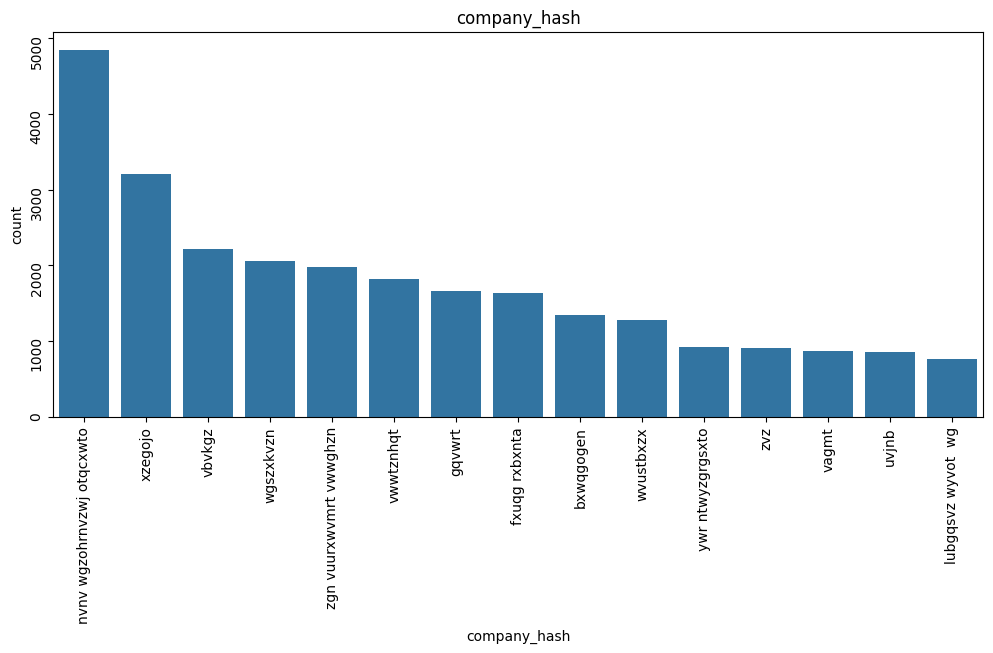

In [ ]:
colnames = 'company_hash'
univariate_analysis(df,colnames,12,5)

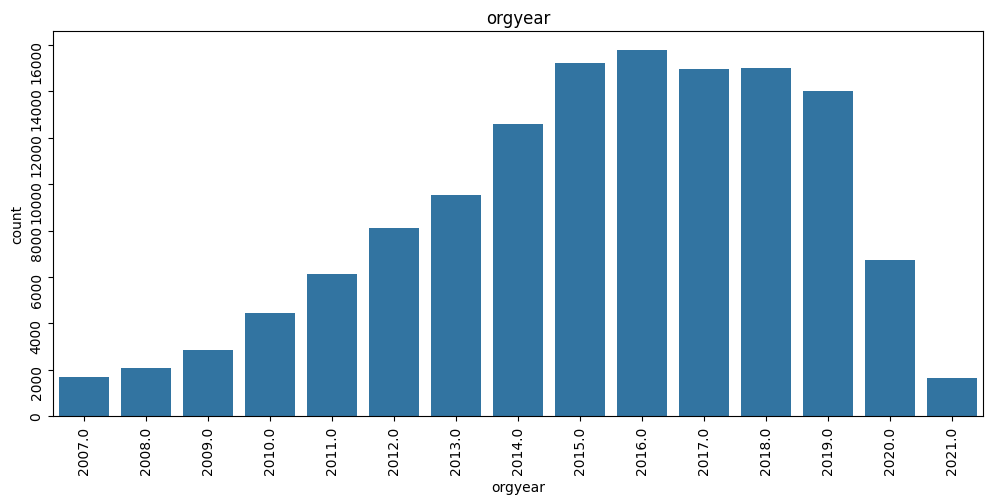

In [ ]:
colnames = 'orgyear'
univariate_analysis(df,colnames,12,5)

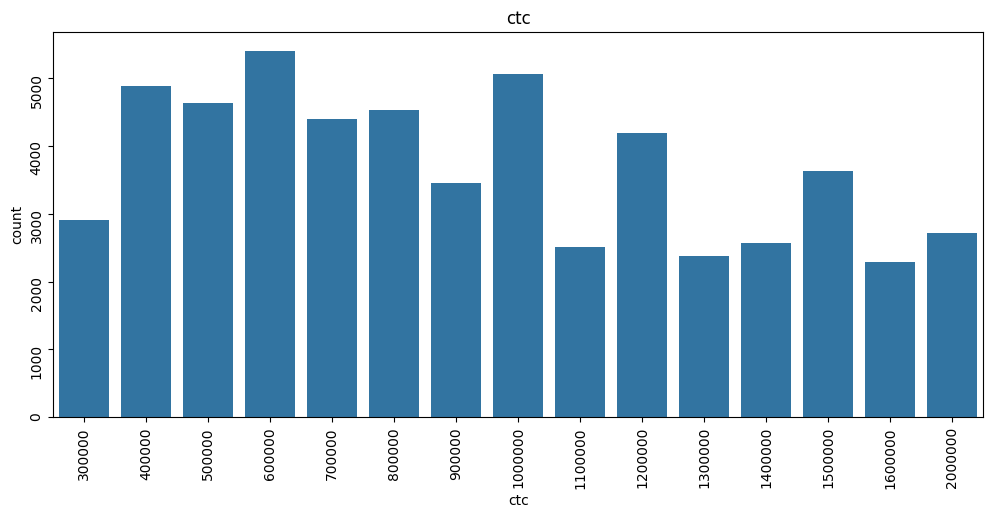

In [ ]:
colnames = 'ctc'
univariate_analysis(df,colnames,12,5)

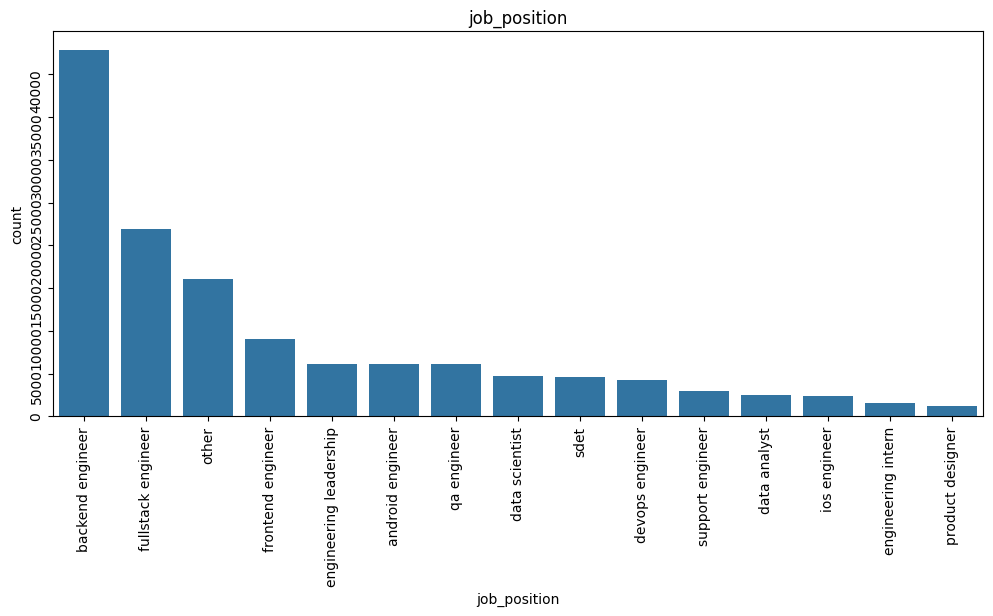

In [ ]:
colnames = 'job_position'
univariate_analysis(df,colnames,12,5)

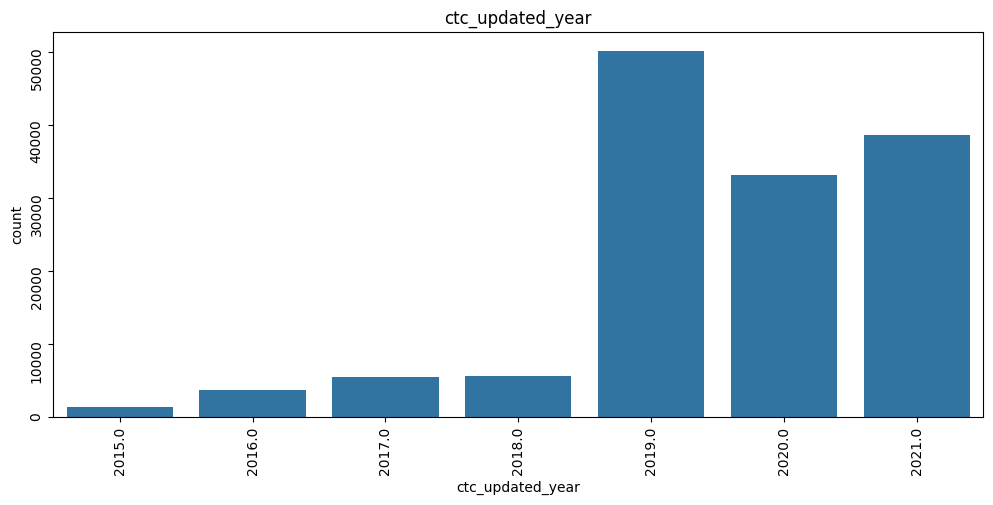

In [ ]:
colnames = 'ctc_updated_year'
univariate_analysis(df,colnames,12,5)

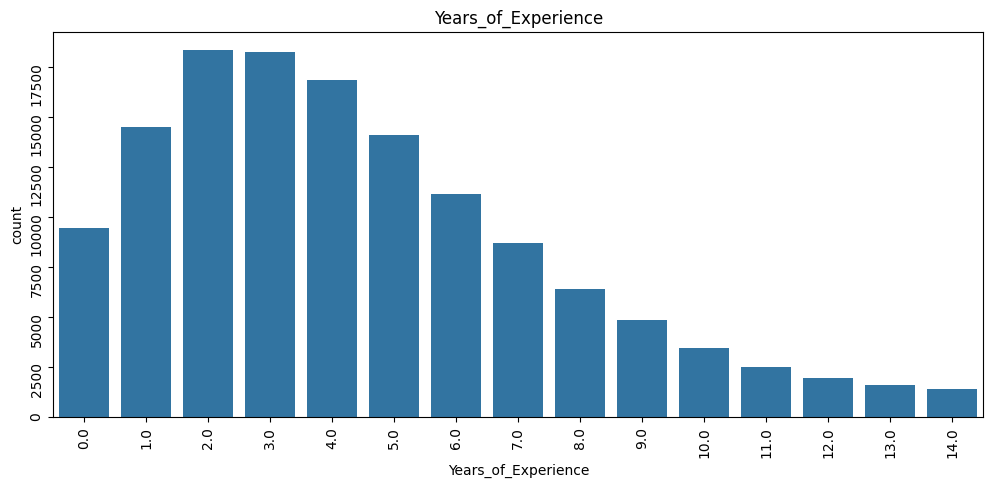

In [ ]:
colnames = 'Years_of_Experience'
univariate_analysis(df,colnames,12,5)

# Bivariate Analysis

In [ ]:
def bivariate_analysis(df, col, depend_var, width, height):
  tmp = df.copy()
  tmp = tmp.groupby([col]).max()[depend_var].reset_index().sort_values(depend_var,ascending=False).head(15)
  plt.figure(figsize=(width, height))
  sns.barplot(data=tmp,x=depend_var,y=col).set(title="Top Paying " + col)
  plt.show()

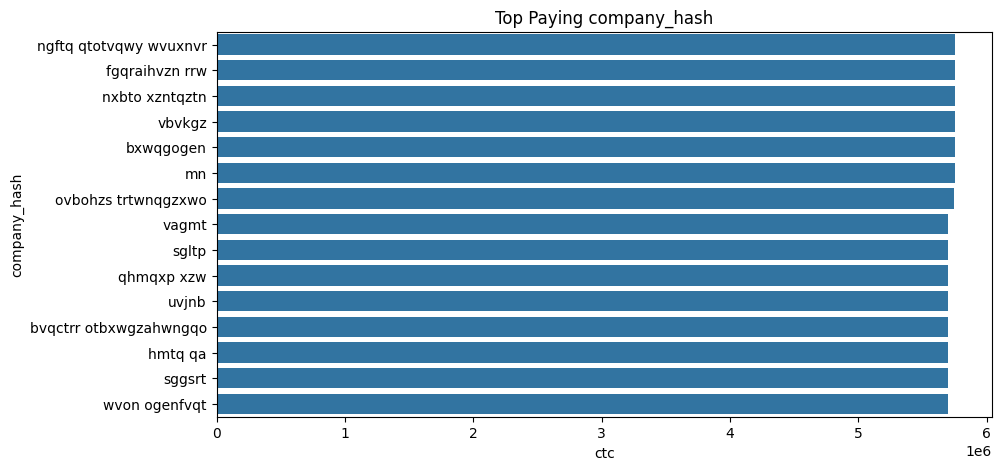

In [ ]:
colnames = 'company_hash'
bivariate_analysis(df,colnames,'ctc',10,5)

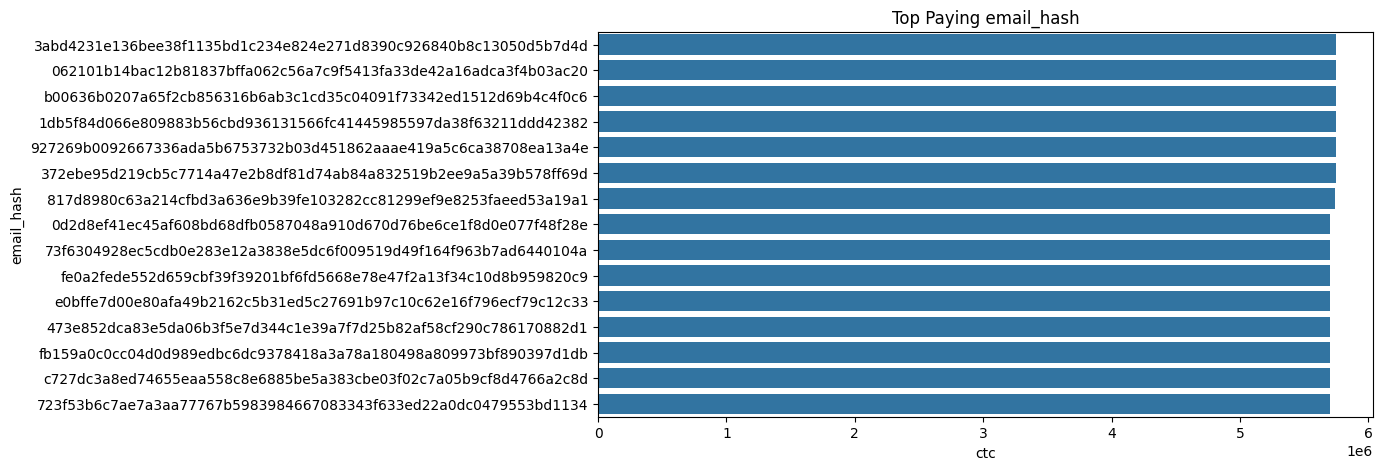

In [ ]:
colnames = 'email_hash'
bivariate_analysis(df,colnames,'ctc',10,5)

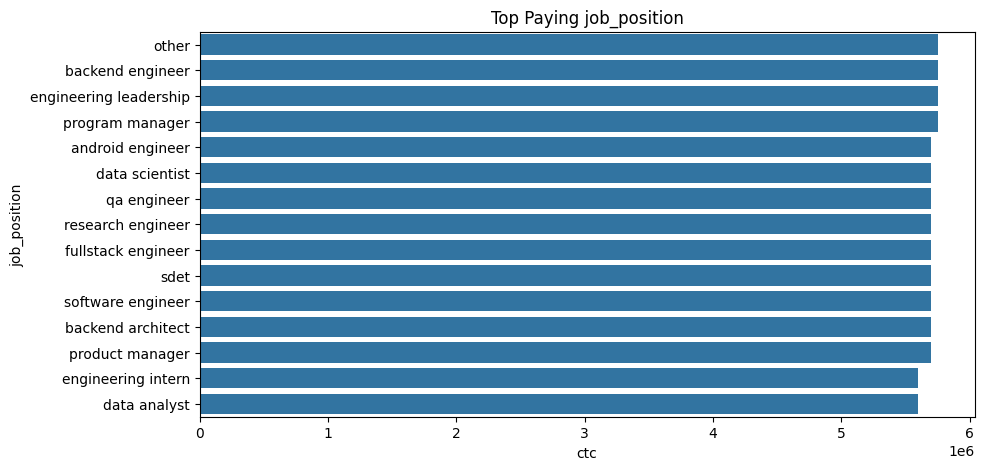

In [ ]:
colnames = 'job_position'
bivariate_analysis(df,colnames,'ctc',10,5)

Manual Clustering

In [ ]:
df.groupby(["company_hash"]).aggregate({"ctc":["mean","median","max","min","count"]}).sort_values(by=("ctc","count"), ascending=False)

ctc                                   
                                   mean     median      max      min count
company_hash                                                              
nvnv wgzohrnvzwj otqcxwto  5.949494e+05   459999.0  5600000   103000  4848
xzegojo                    6.313064e+05   500000.0  5700000   105000  3211
vbvkgz                     2.065006e+06  1900000.0  5750000   105000  2216
wgszxkvzn                  7.250474e+05   600000.0  5650000   102000  2061
zgn vuurxwvmrt vwwghzn     8.189279e+05   600000.0  5500000   105000  1982
...                                 ...        ...      ...      ...   ...
nyxzpxnxct ntwyzgrgsj      5.000000e+05   500000.0   500000   500000     1
nyxzpxej                   1.050000e+06  1050000.0  1050000  1050000     1
nyxzpwhqct ntwyzgrgsxto    4.099990e+05   409999.0   409999   409999     1
nyxzpwhqct                 4.000000e+05   400000.0   400000   400000     1
zzzbzb                     7.200000e+05   720000.0   720000   720000     1

[32624 rows x 5 columns]

In [ ]:
df.groupby(["job_position"]).aggregate({"ctc":["mean","median","max","min","count"]}).sort_values(by=("ctc","count"), ascending=False)

ctc                                   
                                mean     median      max     min  count
job_position                                                           
backend engineer        1.434819e+06  1200000.0  5750000  101000  42853
fullstack engineer      1.137477e+06   900000.0  5700000  102000  21897
other                   8.901850e+05   600000.0  5750000  100800  16072
frontend engineer       1.075940e+06   900000.0  5600000  101000   9053
engineering leadership  2.575330e+06  2600000.0  5750000  101000   6173
android engineer        1.070296e+06   860000.0  5700000  102000   6129
qa engineer             9.444174e+05   690000.0  5700000  105000   6120
data scientist          1.441695e+06  1200000.0  5700000  102000   4687
sdet                    1.052086e+06   750000.0  5700000  105000   4600
devops engineer         1.254984e+06  1000000.0  5500000  101000   4277
support engineer        7.147111e+05   520000.0  5600000  101000   3032
data analyst            8.481377e+05   700000.0  5600000  110000   2522
ios engineer            1.183703e+06   900000.0  5600000  101000   2438
engineering intern      1.018531e+06   700000.0  5600000  110000   1569
product designer        1.255816e+06  1070000.0  5480000  120000   1243
backend architect       2.617901e+06  2650000.0  5700000  102000   1165
product manager         1.912308e+06  1700000.0  5700000  102000    951
research engineer       1.353928e+06  1170000.0  5700000  108000    853
program manager         2.341817e+06  2510000.0  5750000  105000    717
non coder               6.969941e+05   500000.0  5000000  120000    510
database administrator  1.143893e+06   800000.0  5300000  125000    461
cofounder               1.626787e+06  1200000.0  5600000  120000    272
software engineer       1.480965e+06  1200000.0  5700000  110000    226
security leadership     1.400385e+06  1200000.0  4000000  112000    104
release engineer        1.200257e+06   870000.0  5000000  125000    101
system engineer         4.921702e+05   400000.0  1500000  120000     47
consultant              1.437297e+06  1200000.0  3200000  300000     37
engineer                1.289667e+06  1025000.0  4300000  106000     36
software developer      1.339005e+06   865000.0  5300000  128000     20
intern                  1.211471e+06   950000.0  2700000  350000     17
technical staff         1.806562e+06  1550000.0  3500000  105000     16
project engineer        6.800000e+05   450000.0  2200000  330000     15
associate               1.005714e+06   800000.0  2500000  190000     14
data engineer           1.023077e+06   869999.0  1900000  330000     13
student                 6.723077e+05   400000.0  1850000  250000     13
programmer analyst      6.196364e+05   450000.0  1800000  363000     11
manager                 1.543000e+06  1165000.0  3600000  400000     10
technology analyst      7.850000e+05   630000.0  1800000  500000      8
team lead               1.225000e+06  1350000.0  1600000  500000      8
application engineer    1.174286e+06  1070000.0  2500000  300000      7

In [ ]:
df.groupby(["Years_of_Experience"]).aggregate({"ctc":["mean","median","max","min","count"]}).sort_values(by=("ctc","count"), ascending=False)

ctc                                    
                             mean     median      max      min  count
Years_of_Experience                                                  
2.0                  9.627634e+05   700000.0  5750000   101000  18362
3.0                  1.045088e+06   800000.0  5700000   101000  18271
4.0                  1.123416e+06   850000.0  5700000   102000  16881
1.0                  9.258987e+05   700000.0  5600000   101000  14492
5.0                  1.235905e+06   980000.0  5750000   102000  14129
6.0                  1.346987e+06  1100000.0  5750000   101000  11130
0.0                  9.659553e+05   700000.0  5700000   100800   9468
7.0                  1.484045e+06  1250000.0  5700000   101000   8701
8.0                  1.642796e+06  1440000.0  5700000   101000   6417
9.0                  1.763993e+06  1550000.0  5700000   102000   4835
10.0                 1.827566e+06  1600000.0  5743000   101000   3432
11.0                 1.940635e+06  1750000.0  5600000   102000   2474
12.0                 2.003637e+06  1800000.0  5650000   102000   1916
13.0                 2.195904e+06  2020000.0  5750000   103000   1575
14.0                 2.279347e+06  2400000.0  5700000   101000   1372
15.0                 2.335579e+06  2500000.0  5600000   101000   1135
16.0                 2.333923e+06  2500000.0  5700000   105000    871
17.0                 2.453478e+06  2520000.0  5700000   102000    615
18.0                 2.520305e+06  2600000.0  5750000   110000    479
19.0                 2.535664e+06  2650000.0  5700000   103000    440
20.0                 2.268973e+06  2500000.0  5600000   105000    366
21.0                 2.646418e+06  2800000.0  5700000   105000    251
22.0                 2.744213e+06  2900000.0  5500000   130000    183
23.0                 2.357064e+06  2500000.0  5340000   110000    131
24.0                 2.561274e+06  2710000.0  5750000   133000     73
25.0                 2.299500e+06  2350000.0  5000000   105000     60
26.0                 2.284643e+06  2000000.0  5000000   110000     56
30.0                 1.344292e+06  1135000.0  5000000   135000     48
28.0                 2.375895e+06  2615000.0  5500000   110000     38
27.0                 2.635833e+06  2890000.0  5500000   102000     36
29.0                 2.409828e+06  2660000.0  5000000   165000     29
31.0                 2.500000e+06  2800000.0  4000000  1000000      7
33.0                 3.466000e+06  3000000.0  5000000  1830000      5
32.0                 3.575350e+06  3900000.0  5501400  1000000      4
35.0                 2.500000e+06  2500000.0  3000000  2000000      3
34.0                 3.206667e+06  3000000.0  4000000  2620000      3
36.0                 2.500000e+06  2500000.0  2500000  2500000      1
38.0                 1.800000e+06  1800000.0  1800000  1800000      1
40.0                 3.100000e+06  3100000.0  3100000  3100000      1
42.0                 2.000000e+05   200000.0   200000   200000      1
44.0                 8.000000e+05   800000.0   800000   800000      1
47.0                 2.300000e+06  2300000.0  2300000  2300000      1
48.0                 5.500000e+06  5500000.0  5500000  5500000      1
50.0                 1.400000e+05   140000.0   140000   140000      1
51.0                 1.800000e+06  1800000.0  1800000  1800000      1

In [ ]:
def q50(x):
    return x.quantile(0.50)
def q75(x):
    return x.quantile(0.75)

# Creating feature/column: designation

In [ ]:
data_designation = df.groupby(["job_position","Years_of_Experience"]).aggregate({"ctc":[q50,q75]})

In [ ]:
data_designation.shape

(781, 2)

In [ ]:
data_designation.head()

ctc           
                                           q50        q75
job_position     Years_of_Experience                     
android engineer 0.0                  780000.0  1050000.0
                 1.0                  710000.0  1050000.0
                 2.0                  700000.0  1200000.0
                 3.0                  750000.0  1200000.0
                 4.0                  770000.0  1172500.0

In [ ]:
data_designation.index

MultiIndex([(  'android engineer',  0.0),
            (  'android engineer',  1.0),
            (  'android engineer',  2.0),
            (  'android engineer',  3.0),
            (  'android engineer',  4.0),
            (  'android engineer',  5.0),
            (  'android engineer',  6.0),
            (  'android engineer',  7.0),
            (  'android engineer',  8.0),
            (  'android engineer',  9.0),
            ...
            (   'technical staff',  4.0),
            (   'technical staff',  5.0),
            (   'technical staff',  6.0),
            (   'technical staff',  7.0),
            (   'technical staff', 14.0),
            ('technology analyst',  1.0),
            ('technology analyst',  2.0),
            ('technology analyst',  5.0),
            ('technology analyst',  6.0),
            ('technology analyst',  7.0)],
           names=['job_position', 'Years_of_Experience'], length=781)

In [ ]:
data_designation.values

array([[ 780000., 1050000.],
       [ 710000., 1050000.],
       [ 700000., 1200000.],
       ...,
       [ 600000.,  600000.],
       [ 620000.,  640000.],
       [ 770000.,  790000.]])

In [ ]:
dict_designation = {}
for i in range(len(data_designation.index)):
    dict_designation[data_designation.index[i]]=data_designation.values[i]

In [ ]:
df["Designation"]=df[["job_position","Years_of_Experience","ctc"]].apply(lambda x: 3 if x["ctc"]<dict_designation[(x["job_position"],x["Years_of_Experience"])][0] else(1 if x["ctc"]>dict_designation[(x["job_position"],x["Years_of_Experience"])][1] else 2), axis=1)

In [ ]:
df

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_Experience,Designation
0,bxwqgogen,00003288036a44374976948c327f246fdbdf0778546904...,2012.0,3500000,backend engineer,2019.0,7.0,1
1,nqsn axsxnvr,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,2013.0,250000,backend engineer,2020.0,7.0,3
3,bxwqgotbx wgqugqvnxgz,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,2004.0,2000000,fullstack engineer,2021.0,17.0,2
4,fvrbvqn rvmo,00014d71a389170e668ba96ae8e1f9d991591acc899025...,2009.0,3400000,backend engineer,2018.0,9.0,1
5,nvnv wgzohrnvzwj otqcxwto,0001b94dbb1e85477b07fb6558ead3456c3735893c81f4...,2018.0,380000,database administrator,2020.0,2.0,3
...,...,...,...,...,...,...,...,...
153438,tqxwoogz ogenfvqt wvbuho,fffc254e627e4bd1bc0ed7f01f9aebbba7c3cc56ac914e...,2004.0,3529999,qa engineer,2019.0,15.0,1
153439,trnqvcg,fffcf97db1e9c13898f4eb4cd1c2fe862358480e104535...,2015.0,1600000,backend engineer,2018.0,3.0,2
153440,znn avnv srgmvr atrxctqj otqcxwto,fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b01...,2014.0,900000,devops engineer,2019.0,5.0,2
153441,zwq wgqugqvnxgz,ffff49f963e4493d8bbc7cc15365423d84a767259f7200...,2020.0,700000,fullstack engineer,2020.0,0.0,2


# Creating feature/column: Class

In [ ]:
data_class = df.groupby(["company_hash","job_position"]).aggregate({"ctc":[q50,q75]})

In [ ]:
data_class.shape

(53652, 2)

In [ ]:
data_class.head()

ctc          
                                                                    q50       q75
company_hash                                 job_position                        
a                                            product manager   900000.0  900000.0
a b onttr wgqu                               other             180000.0  180000.0
a j uvnxr owyggr ge tzsxzttqxzs vwvatbj vbmx other             463999.0  463999.0
a ntwy ogrhnxgzo ucn rna                     other             400000.0  400000.0
a ntwyzgrgsxto                               android engineer  642500.0  676250.0

In [ ]:
data_class.index

MultiIndex([(                                           'a',        'product manager'),
            (                              'a b onttr wgqu',                  'other'),
            ('a j uvnxr owyggr ge tzsxzttqxzs vwvatbj vbmx',                  'other'),
            (                    'a ntwy ogrhnxgzo ucn rna',                  'other'),
            (                              'a ntwyzgrgsxto',       'android engineer'),
            (                              'a ntwyzgrgsxto',       'backend engineer'),
            (                              'a ntwyzgrgsxto',      'frontend engineer'),
            (                              'a ntwyzgrgsxto',     'fullstack engineer'),
            (                              'a ntwyzgrgsxto',                  'other'),
            (                         'a onvq ntwyzgrgsxto', 'engineering leadership'),
            ...
            (                              'zxzvzxjv sqghu', 'engineering leadership'),
            (   

In [ ]:
data_class.values

array([[900000., 900000.],
       [180000., 180000.],
       [463999., 463999.],
       ...,
       [600000., 600000.],
       [130000., 130000.],
       [720000., 720000.]])

In [ ]:
dict_class = {}
for i in range(len(data_class.index)):
    dict_class[data_class.index[i]]=data_class.values[i]

In [ ]:
df["Class"]=df[["company_hash","job_position","ctc"]].apply(lambda x: 3 if x["ctc"]<dict_class[(x["company_hash"],x["job_position"])][0] else(1 if x["ctc"]>dict_class[(x["company_hash"],x["job_position"])][1] else 2), axis=1)

In [ ]:
df

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_Experience,Designation,Class
0,bxwqgogen,00003288036a44374976948c327f246fdbdf0778546904...,2012.0,3500000,backend engineer,2019.0,7.0,1,1
1,nqsn axsxnvr,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,2013.0,250000,backend engineer,2020.0,7.0,3,2
3,bxwqgotbx wgqugqvnxgz,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,2004.0,2000000,fullstack engineer,2021.0,17.0,2,2
4,fvrbvqn rvmo,00014d71a389170e668ba96ae8e1f9d991591acc899025...,2009.0,3400000,backend engineer,2018.0,9.0,1,1
5,nvnv wgzohrnvzwj otqcxwto,0001b94dbb1e85477b07fb6558ead3456c3735893c81f4...,2018.0,380000,database administrator,2020.0,2.0,3,3
...,...,...,...,...,...,...,...,...,...
153438,tqxwoogz ogenfvqt wvbuho,fffc254e627e4bd1bc0ed7f01f9aebbba7c3cc56ac914e...,2004.0,3529999,qa engineer,2019.0,15.0,1,2
153439,trnqvcg,fffcf97db1e9c13898f4eb4cd1c2fe862358480e104535...,2015.0,1600000,backend engineer,2018.0,3.0,2,2
153440,znn avnv srgmvr atrxctqj otqcxwto,fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b01...,2014.0,900000,devops engineer,2019.0,5.0,2,1
153441,zwq wgqugqvnxgz,ffff49f963e4493d8bbc7cc15365423d84a767259f7200...,2020.0,700000,fullstack engineer,2020.0,0.0,2,3


# Creating feature/column: Tier

In [ ]:
ctc_q70 = df["ctc"].quantile(0.7); ctc_q70

1500000.0

In [ ]:
ctc_q90 = df["ctc"].quantile(0.90); ctc_q90

2640000.0

In [ ]:
df["Tier"] = df["ctc"].apply(lambda x: 3 if x<ctc_q70 else(1 if x>ctc_q90 else 2))

In [ ]:
df

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_Experience,Designation,Class,Tier
0,bxwqgogen,00003288036a44374976948c327f246fdbdf0778546904...,2012.0,3500000,backend engineer,2019.0,7.0,1,1,1
1,nqsn axsxnvr,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,2013.0,250000,backend engineer,2020.0,7.0,3,2,3
3,bxwqgotbx wgqugqvnxgz,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,2004.0,2000000,fullstack engineer,2021.0,17.0,2,2,2
4,fvrbvqn rvmo,00014d71a389170e668ba96ae8e1f9d991591acc899025...,2009.0,3400000,backend engineer,2018.0,9.0,1,1,1
5,nvnv wgzohrnvzwj otqcxwto,0001b94dbb1e85477b07fb6558ead3456c3735893c81f4...,2018.0,380000,database administrator,2020.0,2.0,3,3,3
...,...,...,...,...,...,...,...,...,...,...
153438,tqxwoogz ogenfvqt wvbuho,fffc254e627e4bd1bc0ed7f01f9aebbba7c3cc56ac914e...,2004.0,3529999,qa engineer,2019.0,15.0,1,2,1
153439,trnqvcg,fffcf97db1e9c13898f4eb4cd1c2fe862358480e104535...,2015.0,1600000,backend engineer,2018.0,3.0,2,2,2
153440,znn avnv srgmvr atrxctqj otqcxwto,fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b01...,2014.0,900000,devops engineer,2019.0,5.0,2,1,3
153441,zwq wgqugqvnxgz,ffff49f963e4493d8bbc7cc15365423d84a767259f7200...,2020.0,700000,fullstack engineer,2020.0,0.0,2,3,3


In [ ]:
df["Designation"].value_counts(normalize=True)

3    0.484356
2    0.272638
1    0.243006
Name: Designation, dtype: float64

In [ ]:
df["Class"].value_counts(normalize=True)

2    0.489974
3    0.320123
1    0.189903
Name: Class, dtype: float64

In [ ]:
df["Tier"].value_counts(normalize=True)

3    0.690355
2    0.209759
1    0.099886
Name: Tier, dtype: float64

Top 10 employees (earning more than most of the employees in the company) - Tier 1

In [ ]:
df[(df["Tier"]==1)&(df["Class"]==1)][["email_hash","ctc","Designation","Class","Tier"]].sort_values(by="ctc", ascending=False)[:10]

,email_hash,ctc,Designation,Class,Tier
17993,1db5f84d066e809883b56cbd936131566fc41445985597...,5750000,1,1,1
105505,b00636b0207a65f2cb856316b6ab3c1cd35c04091f7334...,5750000,1,1,1
35263,3abd4231e136bee38f1135bd1c234e824e271d8390c926...,5750000,1,1,1
33154,372ebe95d219cb5c7714a47e2b8df81d74ab84a832519b...,5750000,1,1,1
87730,927269b0092667336ada5b6753732b03d451862aaae419...,5750000,1,1,1
77478,817d8980c63a214cfbd3a636e9b39fe103282cc81299ef...,5743000,1,1,1
73247,7a868cd8d5217ff916ace5b7b991bddd89691f4857cece...,5700000,1,1,1
126181,d29a1836f210614aaa4cb9dd1b32e0d2e6495b2ec8c845...,5700000,1,1,1
32229,35acdf12c098995c2b9348b9e84598d5dc8f5628963605...,5700000,1,1,1
69369,73f6304928ec5cdb0e283e12a3838e5dc6f009519d49f1...,5700000,1,1,1


Bottom 10 employees (earning less than most of the employees in the company)- Tier 3

In [ ]:
df[df["Tier"]==3][["email_hash","ctc","Designation","Class","Tier"]].sort_values(by="ctc", ascending=True)[:10]

,email_hash,ctc,Designation,Class,Tier
134153,dfea01f2c9b0030633005c0d95bc2f93911cd88f98142d...,100800,3,3,3
37122,3de01500c2ef7dd9264fc870f3c509290cf7c8073be5c5...,101000,3,3,3
91246,9854c8e051945d0f37f0c776127f858d2a0a853c4f457c...,101000,3,2,3
14096,171c9f69e59a0ed9948770bc7df159b5bc4d901e512a6d...,101000,3,3,3
88730,941f037f9b7ae339ac7527a33e23473a422b98fbef0c3b...,101000,3,2,3
91654,990048a03509b4967dfc4b74c3c02ff01cac2ecc861689...,101000,3,3,3
92077,99b195ceb246e5e45b435aee0e8a1fbef9fa8e7beffc1d...,101000,3,3,3
72359,790aefabf34038e871a0a36337fa9c3bb41545a998532f...,101000,3,3,3
149905,f9f15bc2eb6f1f1e5cb7668684f0862aae2a6fe1bdb5b6...,101000,3,3,3
88757,942965a32ef51e2d3fa5fd198fd86ec4dad6910afb084b...,101000,3,3,3


Top 10 companies (based on their CTC)

In [ ]:
df[df["Tier"]==1].groupby(["company_hash"]).aggregate({"ctc":"median"}).sort_values(by="ctc", ascending=False)[:10]

,ctc
company_hash,
fgqraihvzn rrw,5750000.0
ceo srgmvr,5700000.0
bvqctrr otbxwgzahwngqo,5700000.0
atruyxd,5700000.0
hmtq qa,5700000.0
wvon ogenfvqt,5700000.0
wxuytqwrgha,5700000.0
ngurxzt lvuvz wg rna,5700000.0
stztqvr vootbmrj,5700000.0


Top 2 positions in every company (based on their CTC)

In [ ]:
df.drop(columns="email_hash").groupby(["company_hash","job_position"]).aggregate({"ctc":"median"}).sort_values(by="ctc",ascending=False)

,,ctc
company_hash,job_position,
fgqraihvzn rrw,other,5750000.0
nxcg,backend architect,5700000.0
ojzguojo xzw,engineering leadership,5700000.0
hmtq qa,product manager,5700000.0
atruyxd,backend engineer,5700000.0
...,...,...
fggnvs,backend architect,102000.0
tzhbv,ios engineer,102000.0
goxogen,backend engineer,101500.0


In [ ]:
df.groupby(["job_position"]).aggregate({"ctc":"median"}).sort_values(by="ctc",ascending=False)

,ctc
job_position,
backend architect,2650000.0
engineering leadership,2600000.0
program manager,2510000.0
product manager,1700000.0
technical staff,1550000.0
team lead,1350000.0
security leadership,1200000.0
data scientist,1200000.0
software engineer,1200000.0


In [ ]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_Experience,Designation,Class,Tier
0,bxwqgogen,00003288036a44374976948c327f246fdbdf0778546904...,2012.0,3500000,backend engineer,2019.0,7.0,1,1,1
1,nqsn axsxnvr,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,2013.0,250000,backend engineer,2020.0,7.0,3,2,3
3,bxwqgotbx wgqugqvnxgz,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,2004.0,2000000,fullstack engineer,2021.0,17.0,2,2,2
4,fvrbvqn rvmo,00014d71a389170e668ba96ae8e1f9d991591acc899025...,2009.0,3400000,backend engineer,2018.0,9.0,1,1,1
5,nvnv wgzohrnvzwj otqcxwto,0001b94dbb1e85477b07fb6558ead3456c3735893c81f4...,2018.0,380000,database administrator,2020.0,2.0,3,3,3


In [ ]:
df1=df.groupby(["company_hash","job_position"]).aggregate({"ctc":"median"}).sort_values(by=["company_hash","ctc"], ascending=[True,False]).reset_index()

In [ ]:
df1[:20]

,company_hash,job_position,ctc
0,a,product manager,900000.0
1,a b onttr wgqu,other,180000.0
2,a j uvnxr owyggr ge tzsxzttqxzs vwvatbj vbmx,other,463999.0
3,a ntwy ogrhnxgzo ucn rna,other,400000.0
4,a ntwyzgrgsxto,other,4000000.0
5,a ntwyzgrgsxto,android engineer,642500.0
6,a ntwyzgrgsxto,backend engineer,600000.0
7,a ntwyzgrgsxto,frontend engineer,500000.0
8,a ntwyzgrgsxto,fullstack engineer,485000.0
9,a onvq ntwyzgrgsxto,engineering leadership,2600000.0


In [ ]:
tdf1=df1.groupby(["company_hash"]).aggregate({"job_position":lambda x: list(x), "ctc":lambda x: list(x)}).reset_index()

In [ ]:
tdf1[:20]

,company_hash,job_position,ctc
0,a,[product manager],[900000.0]
1,a b onttr wgqu,[other],[180000.0]
2,a j uvnxr owyggr ge tzsxzttqxzs vwvatbj vbmx,[other],[463999.0]
3,a ntwy ogrhnxgzo ucn rna,[other],[400000.0]
4,a ntwyzgrgsxto,"[other, android engineer, backend engineer, fu...","[4000000.0, 710000.0, 600000.0, 575000.0, 5000..."
5,a onvq ntwyzgrgsxto,[engineering leadership],[2600000.0]
6,a rgsxw ucn rna,[other],[3000000.0]
7,a t oyvf ogenfvqt xzaxv ucn rna,[engineering leadership],[3000000.0]
8,a t oyvf xzaxv ogenfvqt ucn rna,[engineering leadership],[2500000.0]
9,a t oyvf xzaxv uqxcvnt rxbxnta,"[backend engineer, engineering leadership]","[3150000.0, 2050000.0]"


In [ ]:
tdf1["top_first"]=tdf1.apply(lambda x: x["job_position"][0], axis=1)

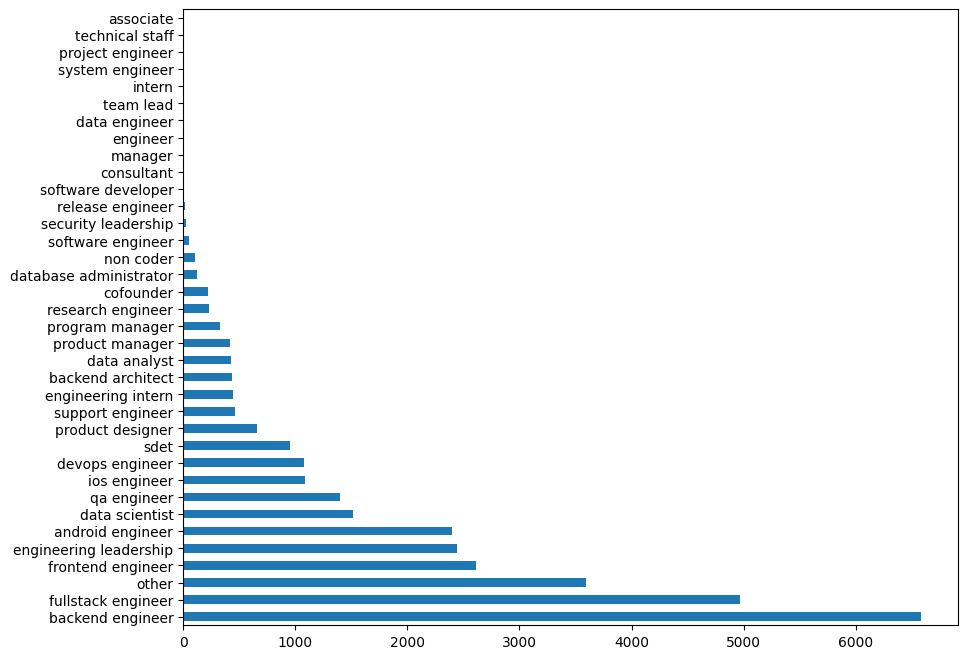

In [ ]:
tdf1["top_first"].value_counts().plot(kind="barh", figsize=(10,8))
plt.show()

- Top 2 positions are backend engineer and fullstack engineer

## Data processing for Unsupervised clustering - Label encoding/ One- hot encoding, Standardization of data

- Data processing for Unsupervised clustering - Label encoding/ One- hot encoding, Standardization of data
- Unsupervised Learning - Clustering
 - Checking clustering tendency
 - Elbow method
 - K-means clustering
 - Hierarchical clustering (you can do this on a sample of the dataset if your process is taking time)

In [ ]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_Experience,Designation,Class,Tier
0,bxwqgogen,00003288036a44374976948c327f246fdbdf0778546904...,2012.0,3500000,backend engineer,2019.0,7.0,1,1,1
1,nqsn axsxnvr,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,2013.0,250000,backend engineer,2020.0,7.0,3,2,3
3,bxwqgotbx wgqugqvnxgz,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,2004.0,2000000,fullstack engineer,2021.0,17.0,2,2,2
4,fvrbvqn rvmo,00014d71a389170e668ba96ae8e1f9d991591acc899025...,2009.0,3400000,backend engineer,2018.0,9.0,1,1,1
5,nvnv wgzohrnvzwj otqcxwto,0001b94dbb1e85477b07fb6558ead3456c3735893c81f4...,2018.0,380000,database administrator,2020.0,2.0,3,3,3


In [ ]:
df.shape

(138297, 10)

In [ ]:
df["job_position"].nunique()

40

In [ ]:
X = df.loc[:,["ctc","job_position","Years_of_Experience","Designation","Class","Tier"]]

In [ ]:
X.head()

,ctc,job_position,Years_of_Experience,Designation,Class,Tier
0,3500000,backend engineer,7.0,1,1,1
1,250000,backend engineer,7.0,3,2,3
3,2000000,fullstack engineer,17.0,2,2,2
4,3400000,backend engineer,9.0,1,1,1
5,380000,database administrator,2.0,3,3,3


In [ ]:
X_encoded = X.copy()

In [ ]:
X_encoded["job_position"]=X_encoded["job_position"].map(dict(df["job_position"].value_counts()))

In [ ]:
X_encoded

,ctc,job_position,Years_of_Experience,Designation,Class,Tier
0,3500000,42853,7.0,1,1,1
1,250000,42853,7.0,3,2,3
3,2000000,21897,17.0,2,2,2
4,3400000,42853,9.0,1,1,1
5,380000,461,2.0,3,3,3
...,...,...,...,...,...,...
153438,3529999,6120,15.0,1,2,1
153439,1600000,42853,3.0,2,2,2
153440,900000,4277,5.0,2,1,3
153441,700000,21897,0.0,2,3,3


In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_encoded)

MinMaxScaler()

In [ ]:
X_scaled = scaler.transform(X_encoded)

In [ ]:
pd.DataFrame(X_scaled, columns=X.columns)

,ctc,job_position,Years_of_Experience,Designation,Class,Tier
0,0.601714,1.000000,0.137255,0.0,0.0,0.0
1,0.026411,1.000000,0.137255,1.0,0.5,1.0
2,0.336189,0.510900,0.333333,0.5,0.5,0.5
3,0.584012,1.000000,0.176471,0.0,0.0,0.0
4,0.049423,0.010596,0.039216,1.0,1.0,1.0
...,...,...,...,...,...,...
138292,0.607024,0.142674,0.294118,0.0,0.5,0.0
138293,0.265383,1.000000,0.058824,0.5,0.5,0.5
138294,0.141471,0.099659,0.098039,0.5,0.0,1.0
138295,0.106068,0.510900,0.000000,0.5,1.0,1.0


# Clustering tendency: pairplot

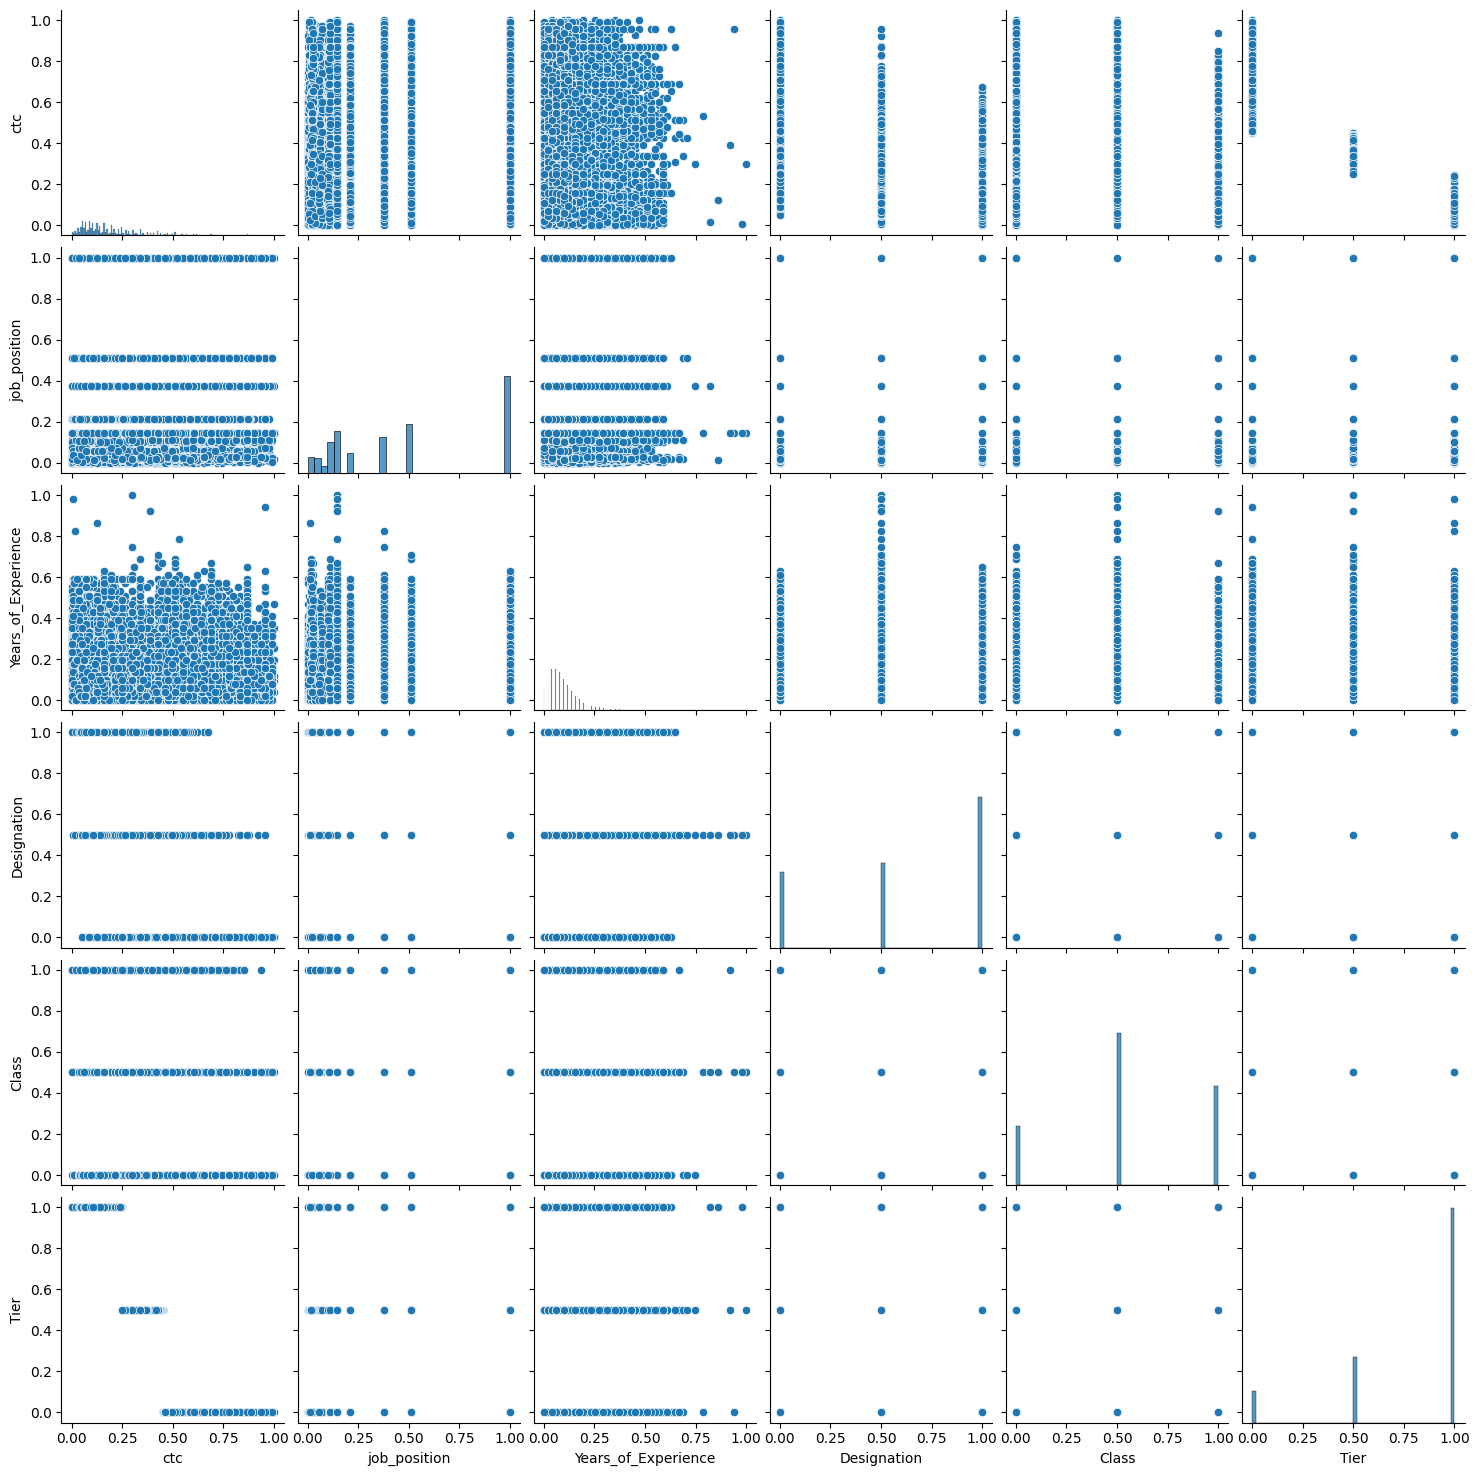

<Figure size 1200x1200 with 0 Axes>

In [ ]:
sns.pairplot(pd.DataFrame(X_scaled, columns=X.columns))
plt.figure(figsize=(12,12))
plt.show()

# KMeans clustering

## Clustering tendency: Elbow method

In [ ]:
wcss = []
for k in range(1, 10):
    model = KMeans(n_clusters = k)
    model.fit(X_scaled)
    wcss.append(model.inertia_)

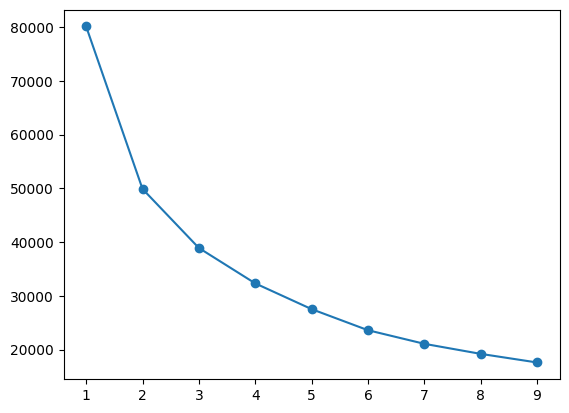

In [ ]:
plt.plot(range(1, 10), wcss, '-o')

- k=3 possible clusters

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)

KMeans(n_clusters=3)

In [ ]:
kmeans.predict(X_scaled)

array([1, 2, 1, ..., 0, 0, 1], dtype=int32)

In [ ]:
kmeans.labels_

array([1, 2, 1, ..., 0, 0, 1], dtype=int32)

In [ ]:
clusters = X.copy()

In [ ]:
clusters["label"]=kmeans.labels_

In [ ]:
clusters

,ctc,job_position,Years_of_Experience,Designation,Class,Tier,label
0,3500000,backend engineer,7.0,1,1,1,1
1,250000,backend engineer,7.0,3,2,3,2
3,2000000,fullstack engineer,17.0,2,2,2,1
4,3400000,backend engineer,9.0,1,1,1,1
5,380000,database administrator,2.0,3,3,3,0
...,...,...,...,...,...,...,...
153438,3529999,qa engineer,15.0,1,2,1,1
153439,1600000,backend engineer,3.0,2,2,2,2
153440,900000,devops engineer,5.0,2,1,3,0
153441,700000,fullstack engineer,0.0,2,3,3,0


## Description of cluster 0

In [ ]:
clusters[clusters["label"]==0][["ctc","Years_of_Experience","Designation","Class","Tier"]].describe()

,ctc,Years_of_Experience,Designation,Class,Tier
count,6.751100e+04,67511.000000,67511.000000,67511.000000,67511.000000
mean,7.443156e+05,4.589889,2.666099,2.281036,2.948912
std,4.258648e+05,3.794269,0.505476,0.620860,0.230884
min,1.008000e+05,0.000000,1.000000,1.000000,1.000000
25%,4.300000e+05,2.000000,2.000000,2.000000,3.000000
50%,6.600000e+05,4.000000,3.000000,2.000000,3.000000
75%,9.500000e+05,6.000000,3.000000,3.000000,3.000000
max,3.500000e+06,50.000000,3.000000,3.000000,3.000000


## Description of cluster 1

In [ ]:
clusters[clusters["label"]==1][["ctc","Years_of_Experience","Designation","Class","Tier"]].describe()

,ctc,Years_of_Experience,Designation,Class,Tier
count,4.035100e+04,40351.000000,40351.000000,40351.000000,40351.000000
mean,2.406265e+06,6.043791,1.205720,1.668583,1.791653
std,1.006683e+06,4.798548,0.427996,0.650821,0.651819
min,4.000000e+05,0.000000,1.000000,1.000000,1.000000
25%,1.650000e+06,3.000000,1.000000,1.000000,1.000000
50%,2.200000e+06,5.000000,1.000000,2.000000,2.000000
75%,3.000000e+06,8.000000,1.000000,2.000000,2.000000
max,5.750000e+06,51.000000,3.000000,3.000000,3.000000


## Description of cluster 2

In [ ]:
clusters[clusters["label"]==2][["ctc","Years_of_Experience","Designation","Class","Tier"]].describe()

,ctc,Years_of_Experience,Designation,Class,Tier
count,3.043500e+04,30435.000000,30435.000000,30435.000000,30435.000000
mean,9.387282e+05,4.119271,2.672219,2.407721,2.854444
std,4.651046e+05,3.202632,0.472273,0.643375,0.352666
min,1.010000e+05,0.000000,1.000000,1.000000,2.000000
25%,6.000000e+05,2.000000,2.000000,2.000000,3.000000
50%,9.000000e+05,3.000000,3.000000,2.000000,3.000000
75%,1.280000e+06,6.000000,3.000000,3.000000,3.000000
max,2.600000e+06,32.000000,3.000000,3.000000,3.000000


In [ ]:
clusters["label"].value_counts(normalize=True)

0    0.488160
1    0.291771
2    0.220070
Name: label, dtype: float64

# Hierarchical clusterinng

In [ ]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_Experience,Designation,Class,Tier
0,bxwqgogen,00003288036a44374976948c327f246fdbdf0778546904...,2012.0,3500000,backend engineer,2019.0,7.0,1,1,1
1,nqsn axsxnvr,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,2013.0,250000,backend engineer,2020.0,7.0,3,2,3
3,bxwqgotbx wgqugqvnxgz,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,2004.0,2000000,fullstack engineer,2021.0,17.0,2,2,2
4,fvrbvqn rvmo,00014d71a389170e668ba96ae8e1f9d991591acc899025...,2009.0,3400000,backend engineer,2018.0,9.0,1,1,1
5,nvnv wgzohrnvzwj otqcxwto,0001b94dbb1e85477b07fb6558ead3456c3735893c81f4...,2018.0,380000,database administrator,2020.0,2.0,3,3,3


In [ ]:
col_agg = {"ctc":"median","job_position":"max","Years_of_Experience":"mean","Designation":"mean","Class":"mean","Tier":"mean"}

In [ ]:
df_new = df.groupby(["job_position"]).aggregate(col_agg); df_new.head()

,ctc,job_position,Years_of_Experience,Designation,Class,Tier
job_position,,,,,,
android engineer,860000.0,android engineer,4.726383,2.258117,2.073748,2.771578
application engineer,1070000.0,application engineer,5.428571,2.000000,2.142857,2.714286
associate,800000.0,associate,5.785714,2.000000,2.071429,2.714286
backend architect,2650000.0,backend architect,9.898712,2.214592,2.059227,1.726180
backend engineer,1200000.0,backend engineer,4.369892,2.232166,2.176557,2.491658


In [ ]:
df_new["job_position"]=df_new["job_position"].map(dict(df["job_position"].value_counts()))

In [ ]:
df_new.head()

,ctc,job_position,Years_of_Experience,Designation,Class,Tier
job_position,,,,,,
android engineer,860000.0,6129,4.726383,2.258117,2.073748,2.771578
application engineer,1070000.0,7,5.428571,2.000000,2.142857,2.714286
associate,800000.0,14,5.785714,2.000000,2.071429,2.714286
backend architect,2650000.0,1165,9.898712,2.214592,2.059227,1.726180
backend engineer,1200000.0,42853,4.369892,2.232166,2.176557,2.491658


In [ ]:
minmax_scale = MinMaxScaler()

In [ ]:
minmax_scale.fit(df_new)

MinMaxScaler()

In [ ]:
X_new = pd.DataFrame(minmax_scale.transform(df_new), columns=df_new.columns, index=df_new.index)

In [ ]:
X_new.head()

,ctc,job_position,Years_of_Experience,Designation,Class,Tier
job_position,,,,,,
android engineer,0.204444,0.142884,0.332656,0.984815,0.368739,0.835465
application engineer,0.297778,0.000000,0.396421,0.226107,0.714286,0.789958
associate,0.177778,0.000163,0.428853,0.226107,0.357143,0.789958
backend architect,1.000000,0.027027,0.802347,0.856878,0.296137,0.005110
backend engineer,0.355556,1.000000,0.300284,0.908534,0.882785,0.613125


In [ ]:
Z = sch.linkage(X_new, method='ward', metric='euclidean')

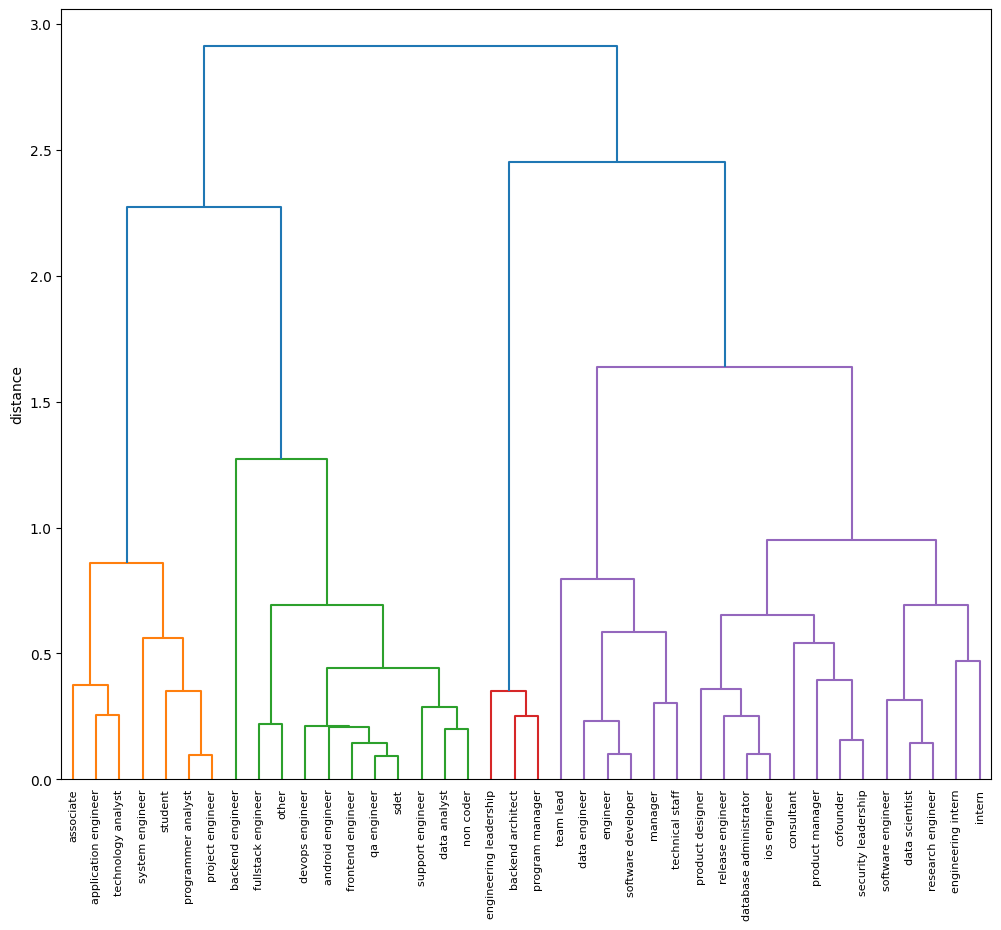

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
sch.dendrogram(Z, labels=X_new.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
ax.set_ylabel('distance')
plt.show()

observations and Recommendations

In [ ]:
clusters["label"].value_counts(normalize=True)

0    0.488160
1    0.291771
2    0.220070
Name: label, dtype: float64

#Observations from Kmeans clustering:

- 29.17% people with median 4 years of experience are in cluster 0
- 48.81% people with median 5 years of experience are in cluster 1
- 22.00% people with median 3 years of experience are in cluster 2
- approx 24.30% PIIs are Designation 1
- approx 27.26% PIIs are Designation 2
- approx 48.43% PIIs are Designation 3
- approx 18.99% PIIs are Class 1
- approx 48.99% PIIs are Class 2
- approx 32.01% PIIs are Class 3
- approx 9.98% companies are Tier 1
- approx 20.97% companies are Tier 2
- approx 69.03% companies are Tier 3
- Top 2 positions are backend engineer and fullstack engineer    

# Actionable Insight


- Top Paying job titles include 'backend architect', 'engineering leadership', 'program manager', 'product manager' and 'technical staff'.

- Top paying company hash include 'fgqraihvzn rrw', 'ceo srgmvr', 'bvqctrr otbxwgzahwngqo', 'atruyxd', 'hmtq qa', 'wvon ogenfvqt', 'wxuytqwrgha', 'ngurxzt lvuvz wg rna','stztqvr vootbmrj' and 'wsx xzw'.

- Mostly people got increment (ctc updated) in years 2019 to 2021. Although, people have been working from 2009-2021 (orgyear). This may be inferred that these 3 years market was very good.

- Mostly dataset contains data with people having 3-12 years of experience. We can try to collect data for other experience years. Also, density of data is not consistent, we can use SMOTE to tackle it but prefer to have original data as it is unssupervised learning.

- Avg CTC seems to be decreasing with year.



## Recommendation:
- Since 69.03% companies are Tier3, employees from these Tier3 companies will have higher chances to enroll for scaler programme and change their domain from non-IT to IT.
- Employees from Tier2 companies will mostly enroll for skill up in their current domain
- We saw similar cluster results while clustering using GMM. When using AgglomerativeClustering, we couldnot train on whole data so trained on 5000 samples only (due to limited RAM & session crash issue), but we see good clusters although on limited data.  
- There is negative correlation between CTC updated year & YOE. It makes sense that CTC updation decreases as YOE increases. Promotion to Manager/Sr Manager takes more years.
- Looking at clusters and all data, we can recommend company to hire employees based on skills and not YOE as for all clusters we see trend that CTC for each clusters varies more or less across wide range of YOE. Good companies tend to give good CTC irrespective of job position.
- Freshers who want to work on technical side should look for roles related to Backend Engineer, SDET, QA engineer, Dataa Scientist, Android Engineer,Full stack engineer to get good salaries as expirience increases.